**A custom scatter plot function in Python**

I wanted an easy way to plot scatter plots with marker size and marker color and the legend on the plot. Despite much Googling and perusing of StackOverflow, I couldn't find an easy way to do this. I tried with the Python version of ggplot but encountered a bug. Therefore, I wrote my own function where color and size are faithfully represented.

In [1]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from ggplot import *    # requires a pip install
%matplotlib inline

## Create data frame for test cases

Values of the dataframe will make it easy to see if the functions are working properly. Later, I'll try a data frame with a variety of distributions.

In [59]:
# Number of samples (training examples). Use a small m (30) to verify plotting properties and large m (1000) as a test case
m = 30
uniform_dist = np.arange(0, m)
gaussian_dist = np.random.normal(loc=0, scale=100, size=m)

# Create dataframe with numerical features
df = pd.DataFrame({'uniform': uniform_dist,
                  'gaussian': gaussian_dist,
                  })

# Create classification features and add to dataframe
k = 5     # Number of groups
groupSize = round(m/k)
df['class_even'] = (['group 1']*groupSize + ['group 2']*groupSize
                     + ['group 3']*groupSize + ['group 4']*groupSize
                     + ['group 5']*(m-groupSize*(k-1)))


In [60]:
df

,gaussian,uniform,class_even
0,84.100155,0,group 1
1,-185.498935,1,group 1
2,-67.885119,2,group 1
3,-13.118258,3,group 1
4,-41.926588,4,group 1
5,-89.513678,5,group 1
6,121.663027,6,group 2
7,72.918925,7,group 2
8,77.782676,8,group 2
9,56.017735,9,group 2


From searching StackOverflow, one way is to group by sizes as described [here](https://stackoverflow.com/questions/24164797/creating-a-matplotlib-scatter-legend-size-related)

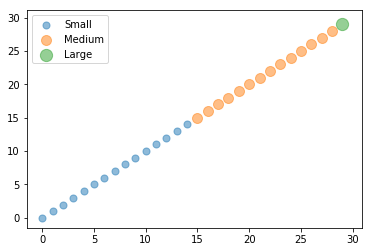

In [46]:
m = 3    # number of bins
bins = np.linspace(df['uniform'].min(), df['uniform'].max(), m)
grouped = df.groupby(np.digitize(df['uniform'], bins))

# Create some sizes and some labels.
sizes = [50*(i+1.) for i in range(m)]
labels = ['Small', 'Medium', 'Large']

f, ax1 = plt.subplots(1,1)
for i, (name, group) in enumerate(grouped):
    ax1.scatter(group['uniform'], group['uniform'], s=sizes[i], alpha=0.5, label=labels[i])

ax1.legend();

However, as you can see, this does not provide a faithful representation of the actual values of the dataframe. Let us return to this later.

### Plotting with color represented

How about plotting the groups by different colors?

That also requires plotting each group separately as described [here](https://stackoverflow.com/questions/17411940/matplotlib-scatter-plot-legend)

If we ignore size representation in the legend, we get a pretty good figure where my classification variable shows up as I expect.

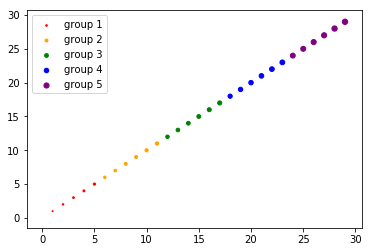

In [48]:
colors = ['red', 'orange', 'green', 'blue', 'purple']
color = 'class_even'
labels = df['class_even'].unique()
f, ax1 = plt.subplots(1,1)
for i,data in enumerate(df[color].unique()):
        dfTemp = df[df[color]==data]
        ax1.scatter(x=dfTemp['uniform'], y=dfTemp['uniform'], s=dfTemp['uniform'], c=colors[i], label=labels[i])
ax1.legend();

## Scatter plots with seaborn

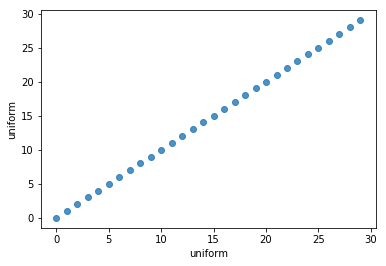

In [20]:
sns.regplot('uniform', 'uniform', data=df, fit_reg=False);

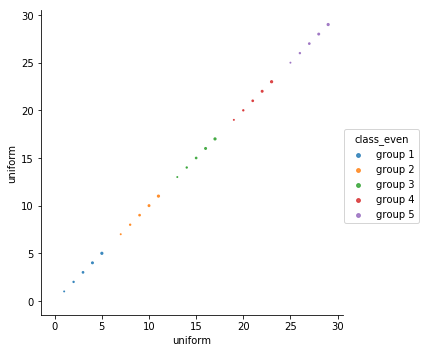

In [58]:
sns.lmplot('uniform', 'uniform', data=df, hue='class_even', fit_reg=False, scatter_kws={'s':df['uniform']});

## Scatter plots with ggplot

In [9]:
from ggplot import *

/Users/lacar/anaconda/lib/python3.5/site-packages/ggplot/utils.py:81: FutureWarning: pandas.tslib is deprecated and will be removed in a future version.
You can access Timestamp as pandas.Timestamp
  pd.tslib.Timestamp,
/Users/lacar/anaconda/lib/python3.5/site-packages/ggplot/stats/smoothers.py:4: FutureWarning: The pandas.lib module is deprecated and will be removed in a future version. These are private functions and can be accessed from pandas._libs.lib instead
  from pandas.lib import Timestamp
/Users/lacar/anaconda/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Scatter plots with g_scatter, a custom function based on matplotlib

The reason for working on this was described [here](https://benslack19.github.io/data%20science/gscatter/)

In [6]:
def g_scatter(df, x, y, size, color, ax):
        
    markerSize=df[size]

    # Make a sizes vector and add it to the dataframe (removed at the end of the function)
    szMaxMarker = 200
    df['sizes_gScatter'] = 1+szMaxMarker*((markerSize-markerSize.min())/(markerSize.max()-markerSize.min()))
    

    # Create a plot as an underlayer, serving as a proxy for the legend for marker size
    noLegendPoints = 5  # number of points (default will be 5)

    # legend points, distributed through the size range
    legendPoints_ideal = np.linspace(markerSize.min(),
                                     markerSize.max(),
                                     noLegendPoints)  

    # get dataframe rows that are closest to the legendPoints_ideal
    # dense list comprehension to get the closest values in the dataset that are distributed
    legendPoints_data = [(df[size].iloc[(df[size]-x).abs().argsort().iloc[0]]) for x in legendPoints_ideal]
    
    # find the rows and make a new dataframe; 
    dfTemp = df[df[size].isin(legendPoints_data)]  
    dfTemp2 = dfTemp.sort_values(by='sizes_gScatter')   # sort by size

    # plot this as an underlayer (plotted here, before plotting all data)
    for i, data in dfTemp2.iterrows():
        # while this is an underlayer, set the plot points to white so it's the same as the background
        ax.scatter(data[x], data[y], s=(data['sizes_gScatter']), c='w', label= "%.2f" % data[size])

    # ax.scatter(data[x], data[y], s=markerSize)   #, c='w', label= "%.2f" % data['feature_sz']) #label=str(data['feature_sz']))

    # --- Place the legend which should only show for the underlaying plot ---
    first_legend = ax.legend(title=size, loc='upper left', bbox_to_anchor=(1,1))
    # Manually set the colors of the marker legends to black (the legend points would have been white or non-visible)
    for i in range(len(first_legend.legendHandles)):
         first_legend.legendHandles[i].set_color('black')

    # Add first legend manually to the current Axes.
    plt.gca().add_artist(first_legend)        

    # colors for categorical variables  
    #colors=['gray', 'blue', 'green', 'yellow', 'red']

    # ax.scatter(df['feature_x'], df['feature_y'], s=df['sizes'], color='k', label=None) #, color='k', 

    for i,data in enumerate(df[color].unique()):
        dfTemp = df[df[color]==data]
        ax.scatter(x=dfTemp[x], y=dfTemp[y], s=dfTemp['sizes_gScatter'], c=colors[i], label=None)

    # re-plotting for the purposes of the class legend

    # Using mpatches to add second legend with colors of the groups 
    import matplotlib.patches as mpatches
    groups = df[color].unique().tolist()
    group_patches = list()
    for i,data in enumerate(groups):
        #print(i, data, groups[i])
        group_patches.append(mpatches.Patch(color=colors[i], label=data))

    # changed the handlelength parameter to 0.7 to get square-shaped colored boxes in the legend    
    ax.legend(handles=group_patches, title='group', loc='upper left', bbox_to_anchor=(1,0.5), handlelength=0.7)


In [17]:
colors = ['red', 'orange', 'yellow', 'greenyellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black']

#### Test when zero is present

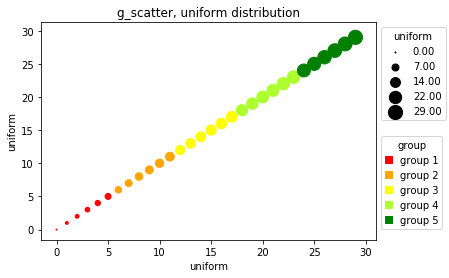

In [7]:
# Plotting with g_scatter function
f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='uniform', size='uniform', color='class_even', ax=ax1);
ax1.set_title('g_scatter, uniform distribution');
ax1.set_xlabel('uniform');
ax1.set_ylabel('uniform');

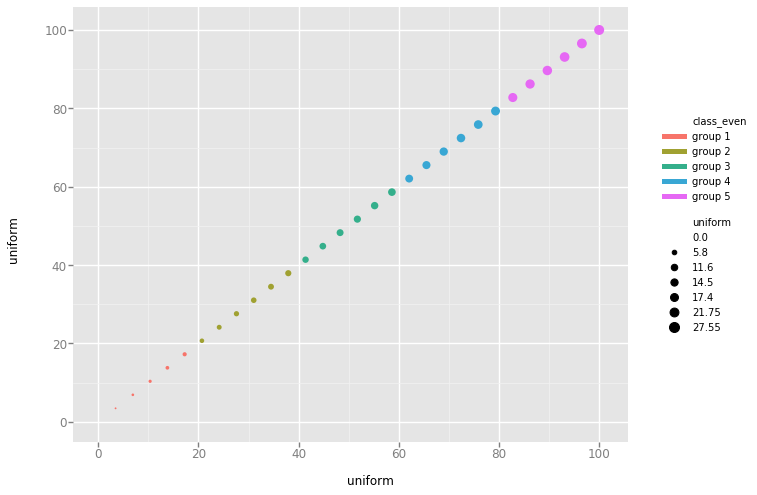

<ggplot: (290789878)>

In [10]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='uniform', size='uniform', color='class_even')) + geom_point()

#### Test when negative numbers, fractions are present

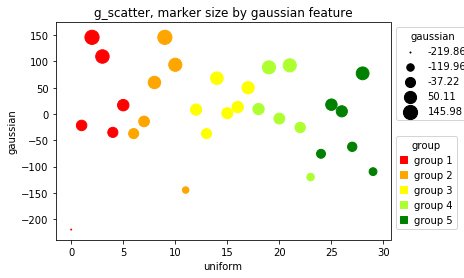

In [18]:
# Plotting with g_scatter function

colors = ['red', 'orange', 'yellow', 'greenyellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black']

f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='gaussian', size='gaussian', color='class_even', ax=ax1);
ax1.set_title('g_scatter, marker size by gaussian feature');
ax1.set_xlabel('uniform')
ax1.set_ylabel('gaussian')

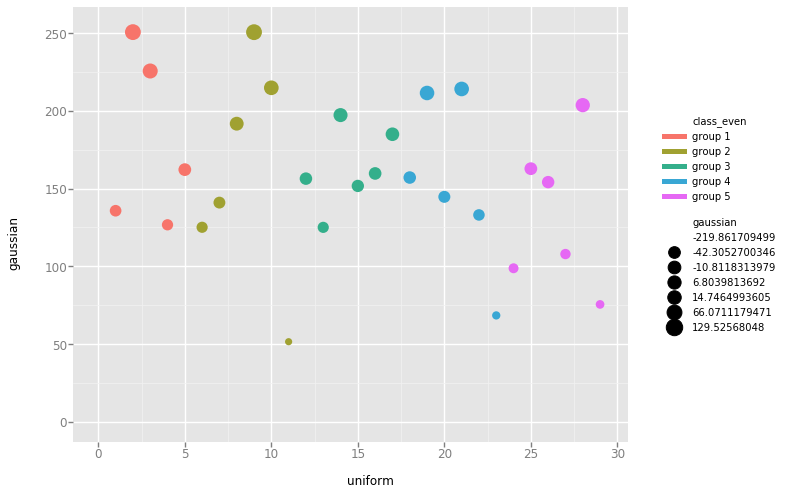

<ggplot: (291414911)>

In [21]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='gaussian', size='gaussian', color='class_even')) + geom_point()

#### Test with negative binomial distribution and all values are positiive

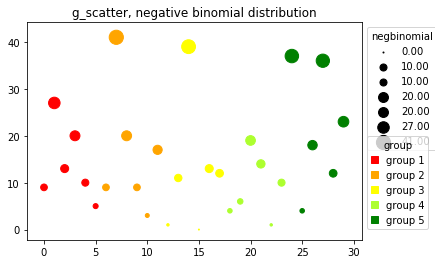

In [22]:
f, ax1 = plt.subplots(1,1);
g_scatter(df=df, x='uniform', y='negbinomial', size='negbinomial', color='class_even', ax=ax1);
ax1.set_title('g_scatter, negative binomial distribution');

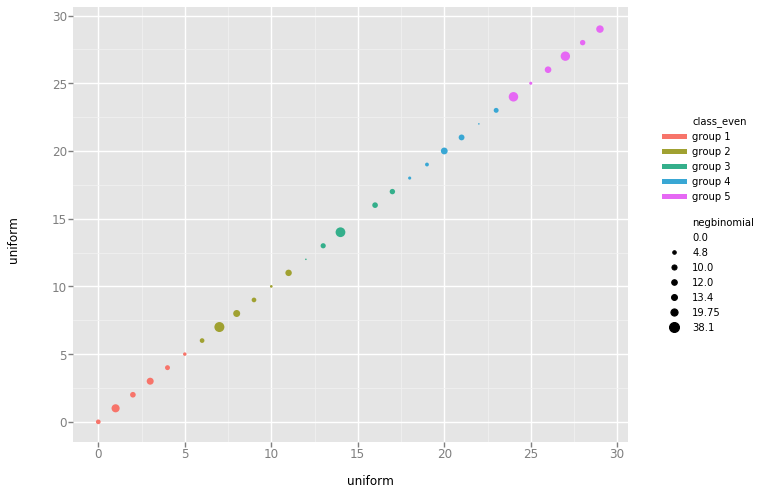

<ggplot: (294229466)>

In [23]:
# Plotting with Python ggplot
f, (ax1) = plt.subplots(1,1)
ggplot(df, aes(x='uniform', y='uniform', size='negbinomial', color='class_even')) + geom_point()